In [9]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [10]:
img1 = Image.open("f2.png")
img2 = Image.open("f3.jpg")
img3 = Image.open("f6.jpg")
Img1arr = np.array(Image.open("f2.png").convert('L'), dtype='int64')
Img2arr = np.array(Image.open("f3.jpg").convert('L'), dtype='int64')
Img3arr = np.array(Image.open("f6.jpg").convert('L'), dtype='int64')

In [11]:
def CalculateIntegral(arr):
    res = np.array(arr,copy=True) 
    rows, cols = arr.shape
    for i in range (rows):
        for j in range (cols):
            if(j==0):
                continue
            res[i][j] = res[i][j] + res[i][j-1]
    for i in range (0,rows):
            if(i==0):
                continue
            res[i] = res[i] + res[i-1]
    return res

In [12]:
def CalculateLocalSum(arr,p1,p2):
    x0 = int(p1[0])
    y0 = int(p1[1])
    x1 = int(p2[0])
    y1 = int(p2[1])
    sum = arr[x1-1][y1-1]
    if(x0 > 0 and y0 <= 0):
        sum = sum - arr[x0-1][y1-1]
    elif(y0 > 0 and x0 <= 0):
        sum = sum - arr[x1-1][y0-1]
    elif (x0 <= 0 and y0 <= 0):
        sum = sum
    else:
        sum = sum - arr[x0-1][y1-1] - arr[x1-1][y0-1] + arr[x0-1][y0-1]
    return sum

In [13]:
def DetectEye(integral,width):
    w = width
    h = 0.15*w
    p1 = np.array([-0.5*h,-0.5*w])+[(0.5*h),(0.5*w)]
    p2 = np.array([0,-0.05*w])+[(0.5*h),(0.5*w)]
    p3 = np.array([0,-0.5*w])+[(0.5*h),(0.5*w)]
    p4 = np.array([0.5*h,-0.05*w])+[(0.5*h),(0.5*w)]
    p5 = np.array([-0.5*h,0.05*w])+[(0.5*h),(0.5*w)]
    p6 = np.array([0,0.5*w])+[(0.5*h),(0.5*w)]
    p7 = np.array([0,0.05*w])+[(0.5*h),(0.5*w)]
    p8 = np.array([0.5*h,0.5*w])+[(0.5*h),(0.5*w)]
    p9 = np.array([0.833*h,-0.325*w])+[(0.5*h),(0.5*w)]
    p10 = np.array([2*h,-0.225*w])+[(0.5*h),(0.5*w)]
    p11 = np.array([0.833*h,-0.1*w])+[(0.5*h),(0.5*w)]
    p12 = np.array([2*h,0.1*w])+[(0.5*h),(0.5*w)]
    p13 = np.array([0.833*h,0.225*w])+[(0.5*h),(0.5*w)]
    p14 = np.array([2*h,0.325*w])+[(0.5*h),(0.5*w)]
    rows,cols = integral.shape
    Max = 0 
    Sum = 0
    x = () 
    arr = integral
    for i in range(int(rows-p14[0])-1):
        for j in range(int(cols-p8[1])-1):
            sum1 = CalculateLocalSum(arr,p1+[i,j],p2+[i,j])
            sum2 = CalculateLocalSum(arr,p3+[i,j],p4+[i,j])
            sum3 = CalculateLocalSum(arr,p5+[i,j],p6+[i,j])
            sum4 = CalculateLocalSum(arr,p7+[i,j],p8+[i,j])
            sum5 = CalculateLocalSum(arr,p9+[i,j],p10+[i,j])
            sum6 = CalculateLocalSum(arr,p11+[i,j],p12+[i,j])
            sum7 = CalculateLocalSum(arr,p13+[i,j],p14+[i,j])
            Sum = sum1+(sum2*(-1))+sum3+(sum4*(-1))+(sum5*(-1))+sum6+(sum7*(-1))
            if Sum > Max:
                Max = Sum
                x = (i,j)
    return x
    

In [36]:
def ExtractDetectedEye(img,pos,width):
    w = width
    h = 0.15*w
    p1 = np.array([-0.5*h,-0.5*w])+[(0.5*h),(0.5*w)]
    p8 = np.array([0.5*h,0.5*w])+[(0.5*h),(0.5*w)]
    p14 = np.array([2*h,0.325*w])+[(0.5*h),(0.5*w)]
    p8 = p8+[pos[0],pos[1]]
    p14 = p14+[pos[0],pos[1]]
    
    nump = np.array(img)
    rows, cols = (nump.shape[0], nump.shape[1])
    arr = [[0 for i in range(cols)] for j in range(rows)]
    for i in range(int(pos[0]),int(p14[0])):
        for j in range(int(pos[1]),int(p8[1])):
            arr[i][j] = nump[i][j]
            
    return arr

## Detecting the eye in the first image ("f2.png") :

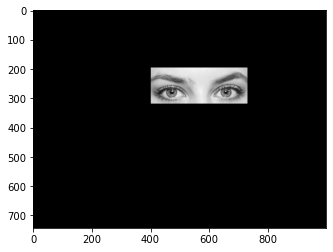

In [44]:
arr = CalculateIntegral(Img1arr)
x = DetectEye(arr,330)
First_Image = Image.open("f2.png").convert('L')
img = ExtractDetectedEye(First_Image,x,330)

#Plotting
plt.imshow(img, cmap = 'gray')

#Saving Output
plt.savefig("First_Image.jpg")

## Detecting the eye in the second image ("f3.jpg") :

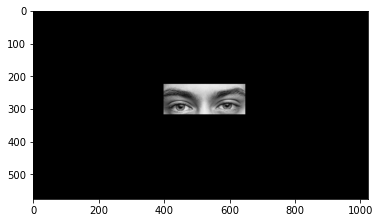

In [45]:
arr = CalculateIntegral(Img2arr)
x = DetectEye(arr,250)
Second_Image = Image.open("f3.jpg").convert('L')
img = ExtractDetectedEye(Second_Image,x,250)

#Plotting
plt.imshow(img, cmap = 'gray')

#Saving Output
plt.savefig("Second_Image.jpg")

## Detecting the eye in the third image ("f6.jpg") :

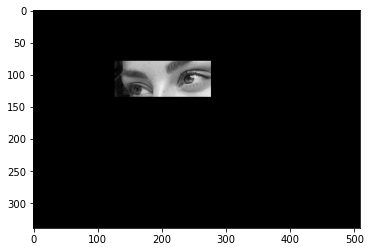

In [46]:
arr = CalculateIntegral(Img3arr)
x = DetectEye(arr,150)
Third_Image = Image.open("f6.jpg").convert('L')
img = ExtractDetectedEye(Third_Image,x,150)

#Plotting
plt.imshow(img, cmap = 'gray')

#Saving Output
plt.savefig("Third_Image.jpg")